This notebook is part of a series intended to review the contents in the __IBM Certified Associate Developer - Quantum Computation using Qiskit v0.2X__ exam as indicated in the [exam's official webpage](https://www.ibm.com/training/certification/C0010300) (See §Exam objectives). It is not intended, however, to furnish a complete preparation, but a guided overview with basic explanations and examples. The reader is encouraged to consult other sources and work on codes and examples as much as possible in order to prepare suitably.

Before starting, let us review the concepts of class, instance and atribute in Python.

# Basic elements of Python - A brief overview

Python is a high-level, general-purpose programming language known for its simplicity and readability. Since Qiskit works through Python language, it is convenient to make a brief overview of some of its basic elements: classes, instances, methods and attributes. (Actually, any so-called object-oriented language works with such concepts. Python is just a specific case.)

We call a __class__ in Python a type of object we can work with and an __instance__ a specific representative of a class. For example, if `Car` is a class, `Jaguar`, `Ferrari`, `Camaro` are instances of `Car`.

A __method__ is a function that is inherent to a class, and that have the ability to modify instances of that cass. For example, the method `start_engine()` may change the state of `Jaguar` to `"Engine_started"`. We note that methods may or may not receive arguments, as illustrated in the codes below.

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h([0, 1])
qc.cx(0, 1)

Here `qc` is an instance of the `QuantumCircuit` class and `qc.h([0, 1])` and `qc.cx(0, 1)` are methods that change the circuit by applying a Hadamard gate to qubits 0 and 1 and a CX-gate with qubit 0 as control and qubit 1 as target (see §1.3 and §1.4).

Now, an __attribute__ of an instance is some property of that instance. For example, `Jaguar.color` may return, say `black`, which is the color of `Jaguar` (which is an instance of the class `Car`).

In [38]:
from qiskit.quantum_info import Statevector

psi = Statevector(psi)

norm_psi = psi.inner(psi)

norm_psi.real

0.9999999999999996

Note that `psi` is an instance of the `Statevector` class and `psi.inner(psi)` is a method that calculates the inner product of `psi` with some supplied state vector (in this case `psi` itself). `real` is then an attribute of the variable `norm_psi` (or of the method `psi.inner()` if you wish) that returns the real part of this variable.

To summarize, attributes represent the state or data associated with an object, while methods define the behavior or actions that the object can perform. Attributes store values, and methods perform operations on those values or interact with other methods or attributes.

# Section 1: Performing operations on quantum Circuits

## 1. 1 Constructing multi-qubit quantum registers

With instances of the `QuantumRegister` class we can create combined sets of qubits. We can then pass these instances as arguments to gate functions or instructions, for example, in order to apply the respective gate or instruction to all qubits of the set at once.

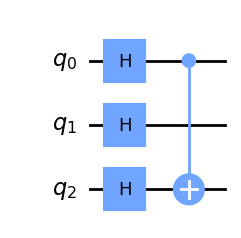

In [39]:
from qiskit import QuantumRegister, QuantumCircuit

qubits = QuantumRegister(3, 'q')

qc = QuantumCircuit(qubits)

qc.h(qubits)
qc.cx(qubits[0], qubits[2]) # We can refer to qubits 0 or 2 of `qubits` simply by indexing `0` or `2`

qc.draw('mpl')

## 1. 2 Measuring quantum circuits in classical registers

In analogy with the `QuantumRegister` class, we can create instances of the `ClassicalRegister` class to specify a set of classical bits that can store the outcomes of measurements performed on qubits.

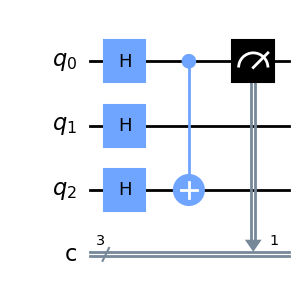

In [43]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qubits = QuantumRegister(3, 'q')
cbits = ClassicalRegister(3, 'c')

qc = QuantumCircuit(qubits, cbits)

qc.h(qubits)
qc.cx(qubits[0], qubits[2])

qc.measure(qubits[0], cbits[1]) # Measuring qubit 0 and storing the result in classical bit 1

qc.draw('mpl')

## 1.3 Using single-qubit gates

We can operate on the qubits of a quantum circuit by using the `QuantumCircuit.gate()` methods (note that "gate" may vary here).

[This tutorial](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) from Qiskit documentation presents the available single-qubit gates together with their respective syntaxes. We summarize them here with a brief explanation.

Let `q = QuantumRegister(1)` and `qc = QuantumCircuit(q)`.

1. __$U$ gate__ (Unitary gate): Applies a unitary operation specified by two angles and a phase

`qc.u(theta, phi, lambda, q)`

2. __$P$ gate__ (Phase gate): Adds a local phase factor to the state $| 1 \rangle$ of the qubit. Equivalent to $U(0, 0, \lambda)$.

`qc.p(lambda, q)`

3. __Identity gate__: Applies the 2x2 identity matrix. Equivalent to $P(0)$.

`qc.id(q)`

4. __Pauli gates__: Applies one of the Pauli matrices ($X$, $Y$ or $Z$)

`qc.x(q)`, `qc.y(q)`, `qc.z(q)`

5. __Clifford gates__:

    5.1. __Hadamard gate__: Implements the mapping $| 0 \rangle \to | + \rangle$ and $| 1 \rangle \to | - \rangle$, which creates (and undoes!) equal superpositions.
    
    `qc.h(q)`
    
    5.2. __$S$ gate__: Square-root of the Z gate (i.e. $S^2 = Z$). Equivalent to a phase gate of $\pi/2$.
    
    `qc.s(q)`
    
    5.3. __$S^\dagger$ gate__: Hermitian conjugate of the $S$ gate. Equivalent to a phase gate of $-\pi/2$
    
    `qc.sdg(q)`
    
6. __$C3$ gates__:

    6.1. __$T$ gate__: Square-root of the $S$ gate. Equivalent to a phase gate of $\pi/4$
    
    `qc.t(q)`
    
    6.2. __$T^\dagger$ gate__: Hermitian conjugate of the $T$ gate. Equivalent to a phase gate of $-\pi/4$
    
    `qc.tdg(q)`

7. __Standard rotations__:

    7.1. __$Rx$ gate__: Rotation around the x-axis of the Bloch sphere
    
    `qc.rx(theta, q)`
    
    7.2. __$Ry$ gate__: Rotation around the y-axis of the Bloch sphere
    
    `qc.ry(theta, q)`
    
    7.3. __$Rz$ gate__: Rotation around the z-axis of the Bloch sphere
    
    `qc.rz(phi)`

## 1.4 Using multi-qubit gates

### 1.4.1 Two-qubit gates

Most of the two-qubit gates are controlled type. This means that they work in the following way. We first specify two qubits, one called *control* and the other called *target*. If the state of the control qubit is $|1\rangle$, a certain unitary gate $U$ is applied to the target; otherwise, nothing happens. The SWAP gate is an exception.

In summary the two-qubit gates are the following.

Let `q = QuantumRegister(2)` and `qc = QuantumCircuit(q)`.

1. __Controlled Pauli gates__:

    1.1 __$C_X$ gate__: If the control is $|1\rangle$, applies a $X$ gate to the target. 
    
    `qc.cx(q[0], q[1])`
    
    1.2 __$C_Y$ gate__: If the control is $|1\rangle$, applies a $Y$ gate to the target. 
    
    `qc.cy(q[0], q[1])`
    
    1.3 __$C_Z$ gate__: If the control is $|1\rangle$, applies a $Z$ gate to the target. 
    
    `qc.cz(q[0], q[1])`

2. __Controlled Hadamard gate__: If the state of the control is $|1\rangle$, applies a Hadamard gate to the target. 

`qc.ch(q[0], q[1])`

3. __Controlled rotation gates__:
    3.1. __$C_{R_x}$ gate__: If the control is $|1\rangle$, applies a $R_X$ gate to the target. 
    
    `qc.crx(theta, q[0], q[1])`

    3.2. __$C_{R_y}$ gate__: If the control is $|1\rangle$, applies a $R_Y$ gate to the target. 
    
    `qc.cry(theta, q[0], q[1])`
    
    3.3. __$C_{R_z}$ gate__: If the control is $|1\rangle$, applies a $R_Z$ gate to the target. 
    
    `qc.crz(phi, q[0], q[1])`
    
4. __Controlled phase rotation__: If both qubits are $|1\rangle$, applies a P gate to the target.

`qc.cp(lambda, q[0], q[1])`

5. __Controlled $U$ rotation__: If the control is $|1\rangle$, applies a U gate to the target.

`qc.u(theta, phi, lambda, q[0], q[1])`

6. __SWAP gate__: Exchanges the state of the two qubits. For the basis vectors we have $|00\rangle \to |00\rangle$, $|10\rangle \to |01\rangle$, etc.

`qc.swap(q[0], q[1])`

### 1.4.2 Three-qubit gates

Let `q = QuantumRegister(3)` and `qc = QuantumCircuit(q)`.

1. __Toffoli gate ($ccx$ gate)__: Flips the third qubit if the state of the first two qubits is $|1\rangle$.

`qc.ccx(q[0], q[1], q[2])`

2. __Controlled swap gate (Fredkin Gate)__: If the first qubit is $|1\rangle$, exchanges the second and the third qubits.

`qc.cswap(q[0], q[1], q[2])`

## 1.5 Using barrier operations

With the `QuantumCircuit.barrier()` method we can place a *barrier* between gates of a circuit to provide both visual and functional separation. If no argument is passed, a barrier is placed between all quantum wires as indicated below.

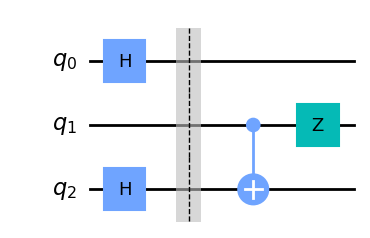

In [12]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)

qc.h([0, 2])

qc.barrier()

qc.cx(1,2)
qc.z(1)

qc.draw('mpl')

To place a barrier only between certain wires we pass them as arguments.

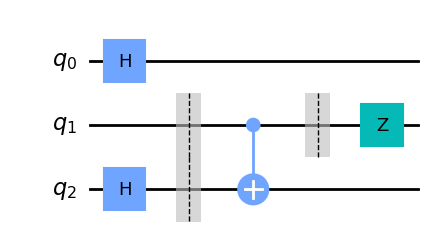

In [13]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)

qc.h([0, 2])

qc.barrier([1, 2])

qc.cx(1,2)

qc.barrier([1])

qc.z(1)

qc.draw('mpl')

__NOTE.__ The gates expressed in Qiskit are an abstraction to the actual gates implemented by a quantum computer or a simulator. Qiskit *transpiles* these gates, so that they can be understood by the desired platform, combining them where possible to optimize the circuit. However, if two gates are separated by a barrier the transpilation process never combines them into a single gate.

## 1.6 Returning the circuit depth

The *depth* of a quantum circuit is the minimum number of operations in the circuits (including measurements but not barriers). Note that if two gates are applied on independent qubits, they count as one operation only. (Hence, in general, *the depth is not the number of gates in the circuit*.)

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2,1)

qc.h(0)
qc.barrier()
qc.cy(0, 1)
qc.measure(0, 0)

print(qc.depth())

3


## 1.7 Extending quantum circuits

We can combine two circuits into one single circuit by using the `QuantumCircuit.compose()` method. As arguments we provide the circuit that wish to combine with our original circuit and the qubits where this second circuit will be placed.

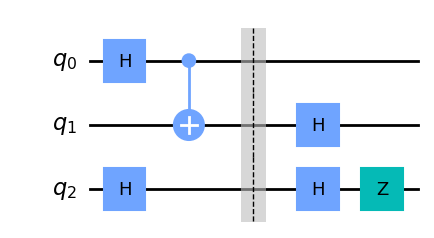

In [6]:
from qiskit import QuantumCircuit

qc_1 = QuantumCircuit(3)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.h(2)
qc_1.barrier()

qc_2 = QuantumCircuit(2)
qc_2.h([0, 1])
qc_2.z(1)

qc = qc_1.compose(qc_2, [1, 2])

qc.draw('mpl')

### 1. 8 Return the OpenQASM string for a circuit

In computer science, an __assembly language__ is a low-level programming language that provides a human-readable representation of machine (binary) instructions. It is designed to be easily understood by humans while still being closely related to the underlying hardware architecture of a given computer system.

OpenQASM (Open Quantum Assembly Language) is a programming language specifically designed for working with the architecture of quantum computers. It is used within Qiskit as the intermediate representation of quantum circuits, i.e. as a bridge between the high-level interface of Qiskit and the low-level "binary-structured" interface of a quantum computer.

OpenQASM is Hardware-agostic, which means that it is readable by any quantum computer, independent of its hardware-details.

The `QuantumCircuit.qasm()` method returns an OpenQASM program that represents a given quantum circuit.

In [3]:
from qiskit import QuantumCircuit

bell_qc = QuantumCircuit(2)

bell_qc.h(0)
bell_qc.cx(0, 1)

qasm_str = bell_qc.qasm()

print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0],q[1];



# References

[1] *Weaver, J. (2022). Qiskit Pocket Guide: Quantum Development with Qiskit. O'Reilly Media; 1st edition.*

[2] [Qiskit documentation](https://qiskit.org/documentation/)